# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [71]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


In [72]:
# url = "http://api.openweathermap.org/data/2.5/weather?"
# response = requests.get(url)
# params = {
#         "q": city,
#         "appid": weather_api_key,
#         "units": "metric",
#     }
# response = requests.get(url, params=params)
# data = response.json()
# print(json.dumps(data, indent=4, sort_keys=True))
city_weather = (requests.get(city_url)).json()
city_weather

{'coord': {'lon': 37.7069, 'lat': 48.5277},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 23.65,
  'feels_like': 23.35,
  'temp_min': 23.65,
  'temp_max': 23.65,
  'pressure': 1017,
  'humidity': 49,
  'sea_level': 1017,
  'grnd_level': 1006},
 'visibility': 10000,
 'wind': {'speed': 1.85, 'deg': 269, 'gust': 1.61},
 'clouds': {'all': 14},
 'dt': 1690009921,
 'sys': {'country': 'UA', 'sunrise': 1689990612, 'sunset': 1690046438},
 'timezone': 10800,
 'id': 705104,
 'name': 'Kostyantynivka',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [73]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port douglas
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | hanjiashu
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | uliastay
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | canandaigua
Processing Record 9 of Set 1 | el nido
Processing Record 10 of Set 1 | chapada dos guimaraes
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | mhamid
Processing Record 14 of Set 1 | kuta
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | sept-iles
Processing Record 17 of Set 1 | touros
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | haiku-pauwela
Processing Record 20 of Set 1 | dudinka
Processing Record 21 of Set 1 | olonkinbyen
Processing Record 22 of Set 1 | choibalsan

Processing Record 39 of Set 4 | old town
Processing Record 40 of Set 4 | port elizabeth
Processing Record 41 of Set 4 | oliver
Processing Record 42 of Set 4 | papao
Processing Record 43 of Set 4 | borkum
Processing Record 44 of Set 4 | talnakh
Processing Record 45 of Set 4 | kayar
Processing Record 46 of Set 4 | jilib
Processing Record 47 of Set 4 | qaqortoq
Processing Record 48 of Set 4 | uiju
Processing Record 49 of Set 4 | el jadid
Processing Record 0 of Set 5 | brokopondo
Processing Record 1 of Set 5 | hinthada
Processing Record 2 of Set 5 | nookat
City not found. Skipping...
Processing Record 3 of Set 5 | cumana
Processing Record 4 of Set 5 | aasiaat
Processing Record 5 of Set 5 | fremantle
Processing Record 6 of Set 5 | cidade velha
Processing Record 7 of Set 5 | ad dabbah
Processing Record 8 of Set 5 | kone
Processing Record 9 of Set 5 | princeville
Processing Record 10 of Set 5 | fukushima
Processing Record 11 of Set 5 | onguday
Processing Record 12 of Set 5 | carrollton
Proces

Processing Record 34 of Set 8 | el granada
Processing Record 35 of Set 8 | alotau
City not found. Skipping...
Processing Record 36 of Set 8 | zakamensk
Processing Record 37 of Set 8 | crane
Processing Record 38 of Set 8 | atafu village
Processing Record 39 of Set 8 | gordonvale
Processing Record 40 of Set 8 | punta del este
Processing Record 41 of Set 8 | zhangjiakou
Processing Record 42 of Set 8 | ad darb
Processing Record 43 of Set 8 | hobyo
Processing Record 44 of Set 8 | tommot
Processing Record 45 of Set 8 | ballina
Processing Record 46 of Set 8 | conde
Processing Record 47 of Set 8 | cabo san lucas
Processing Record 48 of Set 8 | timbuktu
Processing Record 49 of Set 8 | praia da vitoria
Processing Record 0 of Set 9 | imbituba
Processing Record 1 of Set 9 | plastun
Processing Record 2 of Set 9 | barro alto
Processing Record 3 of Set 9 | doma
Processing Record 4 of Set 9 | fort st. john
Processing Record 5 of Set 9 | fisterra
Processing Record 6 of Set 9 | jiuquan
Processing Record

Processing Record 23 of Set 12 | berrechid
Processing Record 24 of Set 12 | cinisi
Processing Record 25 of Set 12 | la foa
Processing Record 26 of Set 12 | peace river
Processing Record 27 of Set 12 | novo aripuana
Processing Record 28 of Set 12 | plettenberg bay
Processing Record 29 of Set 12 | sipalay
Processing Record 30 of Set 12 | mata-utu
Processing Record 31 of Set 12 | howrah
Processing Record 32 of Set 12 | port blair
Processing Record 33 of Set 12 | downpatrick
Processing Record 34 of Set 12 | yarmouth
Processing Record 35 of Set 12 | turan
Processing Record 36 of Set 12 | namibe
Processing Record 37 of Set 12 | las tablas
Processing Record 38 of Set 12 | buchanan
Processing Record 39 of Set 12 | raja
Processing Record 40 of Set 12 | myaydo
Processing Record 41 of Set 12 | hutchinson
Processing Record 42 of Set 12 | kyzyl-mazhalyk
Processing Record 43 of Set 12 | maloye ganyushkino
Processing Record 44 of Set 12 | belmonte
Processing Record 45 of Set 12 | vilyuchinsk
Processi

In [74]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [95]:
# Display sample data
city_data_df["Date"]=(pd.to_datetime(city_data_df["Date"],unit='s')).dt.date

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port douglas,-16.4833,145.4667,23.36,66,2,3.09,AU,2023-07-22
1,port-aux-francais,-49.3500,70.2167,0.70,96,100,1.52,TF,2023-07-22
2,hanjiashu,39.1875,117.0731,23.98,51,9,3.22,CN,2023-07-22
3,waitangi,-43.9535,-176.5597,12.12,91,100,3.13,NZ,2023-07-22
4,puerto ayora,-0.7393,-90.3518,24.57,81,94,4.43,EC,2023-07-22


In [96]:
output_directory = "output_data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
# Export the City_Data into a csv
#city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")
city_data_df.to_csv(os.path.join(output_directory, "cities.csv"), index_label="City_ID")


In [97]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port douglas,-16.4833,145.4667,23.36,66,2,3.09,AU,2023-07-22
1,port-aux-francais,-49.3500,70.2167,0.70,96,100,1.52,TF,2023-07-22
2,hanjiashu,39.1875,117.0731,23.98,51,9,3.22,CN,2023-07-22
3,waitangi,-43.9535,-176.5597,12.12,91,100,3.13,NZ,2023-07-22
4,puerto ayora,-0.7393,-90.3518,24.57,81,94,4.43,EC,2023-07-22


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

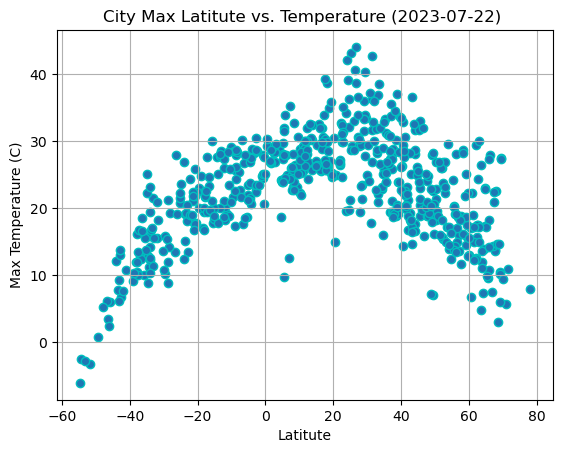

In [113]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolor="c")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitute")
plt.ylabel("Max Temperature (C)")
date=city_data_df["Date"].min()
plt.title(f"City Max Latitute vs. Temperature ({date}) ")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

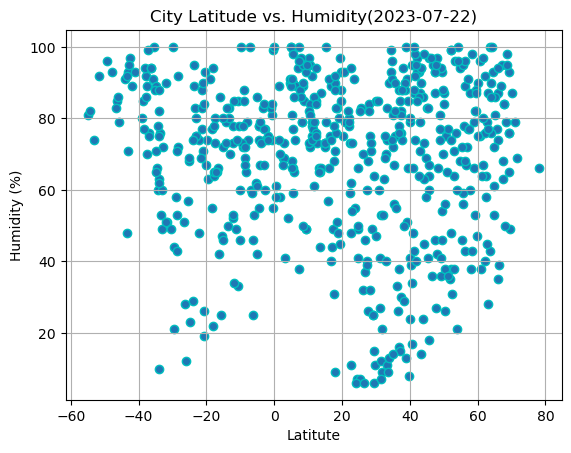

In [100]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolor="c")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitute")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity({date})")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

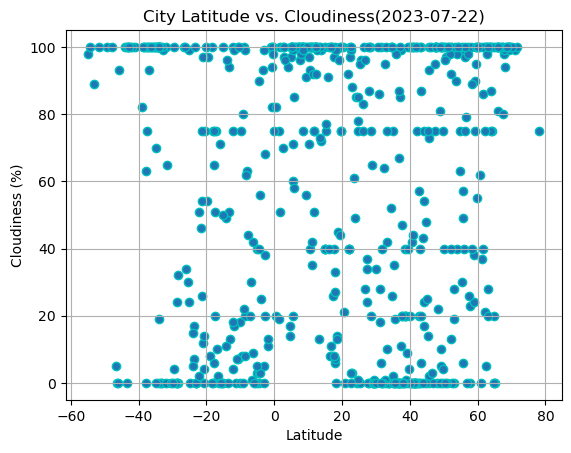

In [103]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolor="c")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

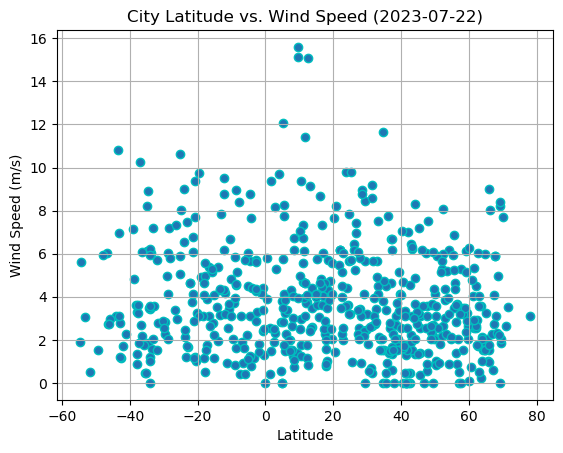

In [114]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolor="c")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")            
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [119]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
#x_values = city_data_df[""]
#y_values = city_data_df[]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [115]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hanjiashu,39.1875,117.0731,23.98,51,9,3.22,CN,2023-07-22
5,uliastay,47.7417,96.8444,24.15,27,100,3.58,MN,2023-07-22
6,albany,42.6001,-73.9662,18.23,93,0,0.45,US,2023-07-22
7,canandaigua,42.8742,-77.2880,17.96,87,0,2.24,US,2023-07-22
8,el nido,11.1858,119.3956,25.64,92,100,4.68,PH,2023-07-22


In [117]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) <0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port douglas,-16.4833,145.4667,23.36,66,2,3.09,AU,2023-07-22
1,port-aux-francais,-49.3500,70.2167,0.70,96,100,1.52,TF,2023-07-22
3,waitangi,-43.9535,-176.5597,12.12,91,100,3.13,NZ,2023-07-22
4,puerto ayora,-0.7393,-90.3518,24.57,81,94,4.43,EC,2023-07-22
9,chapada dos guimaraes,-15.4606,-55.7497,17.81,47,0,2.76,BR,2023-07-22


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.5649348274472114


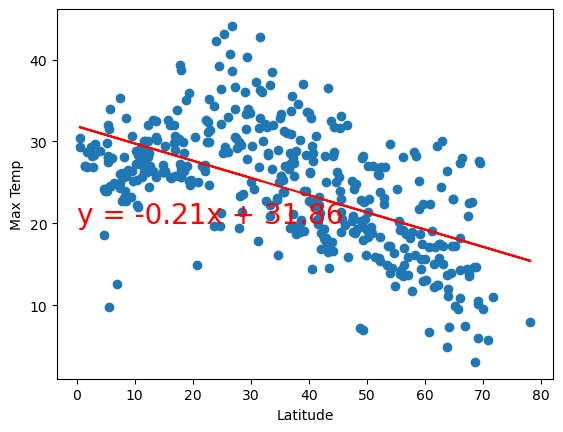

In [124]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(0,17), fontsize=17, color="red")
print(f"The r-value is {rvalue}")

The r-value is: 0.818376072379446


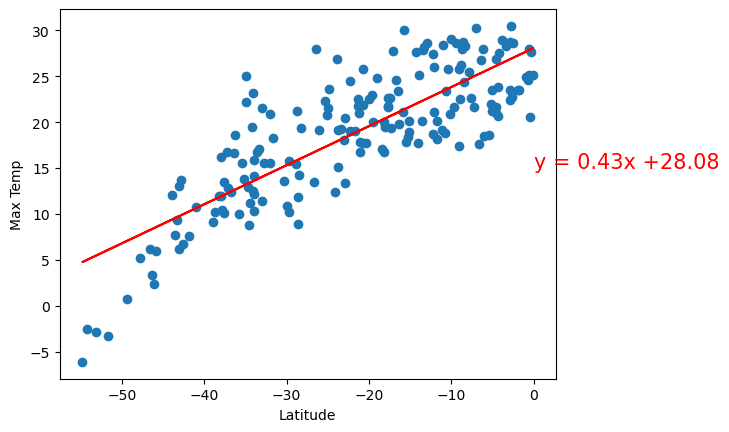

In [128]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values= southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"-r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(0,17), fontsize=17, color="red")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The relationship between latitude and max temp in the northern hemi is not coorelated sine the r value is negative and less than 0.05.  The relationship between latitude and max temp in the southern hemi is coorelated because the r value is positive and its greater than 0.05

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.01869461846171083


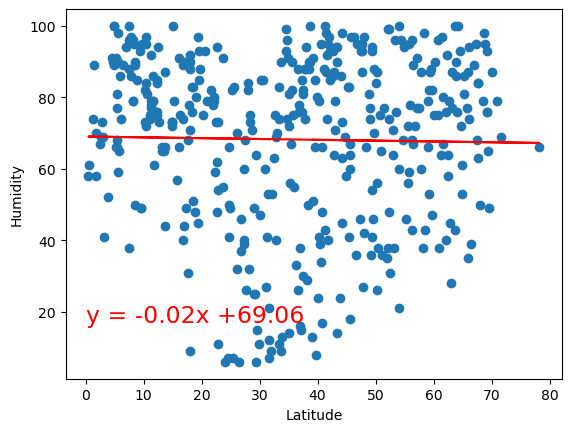

In [132]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values= northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(0,17), fontsize=17, color="red")
print(f"The r-value is: {rvalue}")

The r-value is: -0.16749167621771063


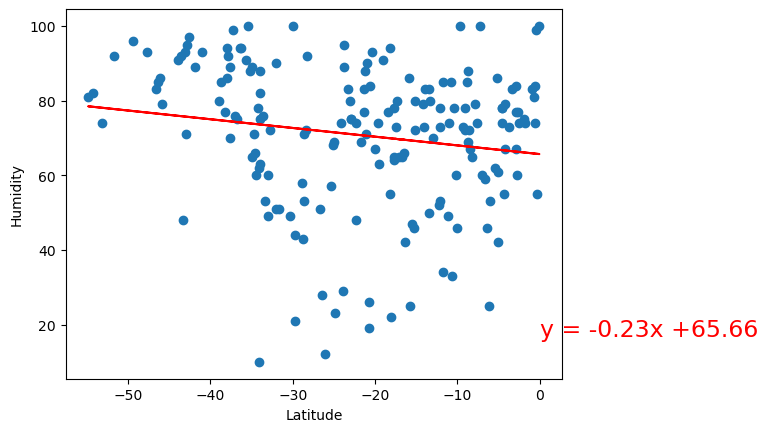

In [131]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values= southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(0,17), fontsize=17, color="red")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** there are no linear relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.03976015882966621


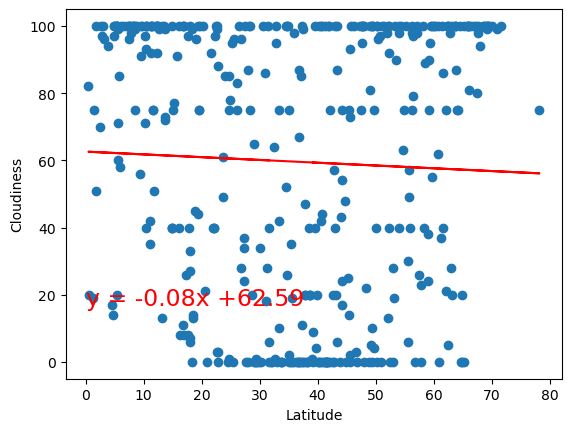

In [133]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values= northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(0,17), fontsize=17, color="red")
print(f"The r-value is: {rvalue}")

The r-value is: 0.02056735429994368


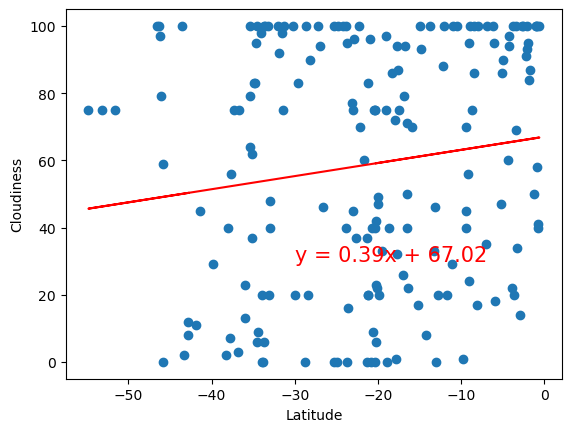

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values= southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(0,17), fontsize=17, color="red")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.17357482588825146


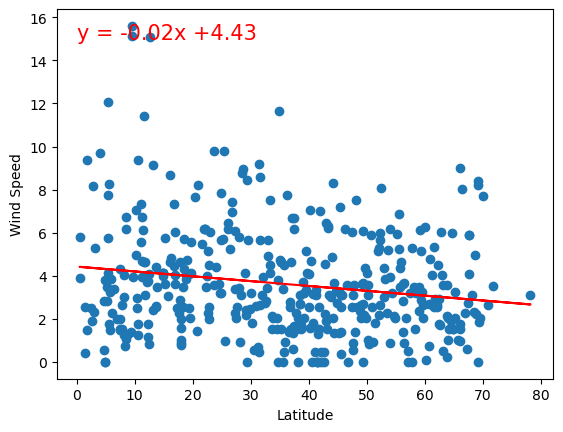

In [135]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values= northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(0,15), fontsize=15, color="red")
print(f"The r-value is: {rvalue}")

The r-value is: -0.005731480179596551


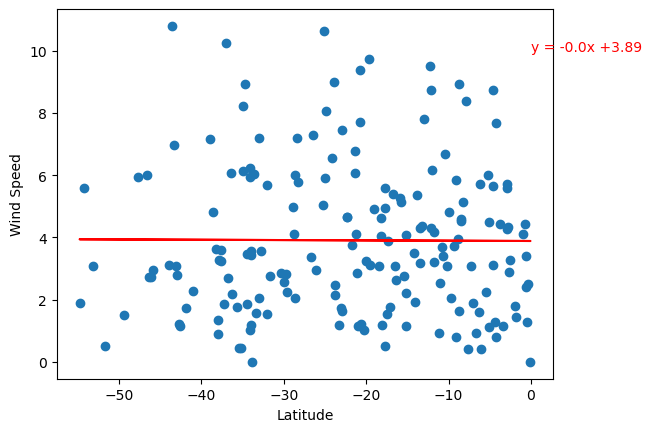

In [140]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values= southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(0,10), fontsize=10, color="red")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE